# Part I - (Ford GoBike System Data Exploration)
#### by *Maureen Anyango*

## Table of Contents

- Introduction
- Preliminary Wrangling
    - Data gathering & assessing
    - Data Cleaning
    
- Data Exploration
    - Univariate Exploration
    - Bivariate Exploration
    - Multivariate Exploration
    
 
## Introduction

> The Ford GoBike System dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2019.


## Preliminary Wrangling

### Data Gathering & Assessing

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
gobike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
gobike_df.shape

(183412, 16)

In [4]:
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# Check for missing values
gobike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Checking for duplicates
sum(gobike_df.duplicated())

0

In [7]:
# Checking unique values in the variables
print(gobike_df.member_gender.unique())
print(gobike_df.user_type.unique())
print(gobike_df.bike_share_for_all_trip.unique())

['Male' nan 'Other' 'Female']
['Customer' 'Subscriber']
['No' 'Yes']


### Data Cleaning

In [8]:
# Make a copy of the dataframe
fgobike_clean = gobike_df.copy()

In [9]:
# Drop unnecessary columns for the analysis
fgobike_clean.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 
                   'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id'], axis=1, inplace=True)
fgobike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes


In [10]:
# Drop rows with missing values
fgobike_clean = fgobike_clean.dropna()
fgobike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# Convert start_time & end_time column datatype to datetime
fgobike_clean.start_time = pd.to_datetime(fgobike_clean.start_time)
fgobike_clean.end_time = pd.to_datetime(fgobike_clean.end_time)
fgobike_clean[['start_time', 'end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [12]:
print(fgobike_clean.start_time.dt.year.unique())
print(fgobike_clean.end_time.dt.year.unique())

[2019]
[2019]


In [13]:
# Extract month, weekday & hour from start_time & end_time
fgobike_clean['start_month'] = fgobike_clean.start_time.dt.month_name()
fgobike_clean['start_day'] = fgobike_clean.start_time.dt.day_name()
fgobike_clean['start_hour'] = fgobike_clean.start_time.dt.hour

fgobike_clean['end_month'] = fgobike_clean.end_time.dt.month_name()
fgobike_clean['end_day'] = fgobike_clean.end_time.dt.day_name()
fgobike_clean['end_hour'] = fgobike_clean.end_time.dt.hour

In [14]:
fgobike_clean['age'] = (2019 - fgobike_clean.member_birth_year).astype(int)

In [15]:
# Convert column datatypes
cols = ['member_gender', 'user_type', 'bike_share_for_all_trip']
fgobike_clean[cols]= fgobike_clean[cols].astype('category')

In [16]:
# create a new column from duration_sec column
fgobike_clean['duration_min'] = fgobike_clean['duration_sec']/60

In [17]:
fgobike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,February,Thursday,17,March,Friday,8,35,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,February,Thursday,12,March,Friday,5,47,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,February,Thursday,17,March,Friday,4,30,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,February,Thursday,23,March,Friday,0,45,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,February,Thursday,23,March,Friday,0,60,29.883333


In [18]:
fgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_name         174952 non-null object
end_station_name           174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
start_month                174952 non-null object
start_day                  174952 non-null object
start_hour                 174952 non-null int64
end_month                  174952 non-null object
end_day                    174952 non-null object
end_hour                   174952 non-null int64
age                        174952 non-null int64
duration_min               174952 non-null float64
dtypes: category(3)

In [19]:
# Save the dataframe to csv
fgobike_clean.to_csv('clean_data.csv', index=False)

In [20]:
# Load the clean data
gobike_clean = pd.read_csv('clean_data.csv')
gobike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,February,Thursday,17,March,Friday,8,35,869.750000
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,February,Thursday,12,March,Friday,5,47,1030.900000
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,February,Thursday,17,March,Friday,4,30,608.166667
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,February,Thursday,23,March,Friday,0,45,26.416667
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,February,Thursday,23,March,Friday,0,60,29.883333


In [21]:
# Concise summary of the dataframe
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_name         174952 non-null object
end_station_name           174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_month                174952 non-null object
start_day                  174952 non-null object
start_hour                 174952 non-null int64
end_month                  174952 non-null object
end_day                    174952 non-null object
end_hour                   174952 non-null int64
age                        174952 non-null int64
duration_min               174952 non-null float64
dtypes: float64(2), int64(4), object(11)


In [22]:
# Convert start_time & end_time column datatype to datetime
gobike_clean.start_time = pd.to_datetime(gobike_clean.start_time)
gobike_clean.end_time = pd.to_datetime(gobike_clean.end_time)

# Convert column datatypes
cols = ['member_gender', 'user_type', 'bike_share_for_all_trip']
gobike_clean[cols]= gobike_clean[cols].astype('category')

In [23]:
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_name         174952 non-null object
end_station_name           174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
start_month                174952 non-null object
start_day                  174952 non-null object
start_hour                 174952 non-null int64
end_month                  174952 non-null object
end_day                    174952 non-null object
end_hour                   174952 non-null int64
age                        174952 non-null int64
duration_min               174952 non-null float64
dtypes: category(3)

In [24]:
# Generate descriptive statistics
gobike_clean.describe()

,duration_sec,member_birth_year,start_hour,end_hour,age,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803135,13.456165,13.609533,34.196865,11.733379
std,1642.204905,10.118731,4.734282,4.748029,10.118731,27.370082
min,61.000000,1878.000000,0.000000,0.000000,18.000000,1.016667
25%,323.000000,1980.000000,9.000000,9.000000,27.000000,5.383333
50%,510.000000,1987.000000,14.000000,14.000000,32.000000,8.500000
75%,789.000000,1992.000000,17.000000,18.000000,39.000000,13.150000
max,84548.000000,2001.000000,23.000000,23.000000,141.000000,1409.133333


In [25]:
gobike_clean.shape

(174952, 17)

### What is the structure of your dataset?

> The initial dataset had 183,412 rows(fordgobike trips) and 16 variable columns after some preliminary wrangling and cleaning the structure of the dataset is 174,952 rows(fordgobike trips) and 16 variable columns. There are 3 category, 2 datetime, 1 float, 4 int and 6 object variables.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out which hour(s) of the day, which day(s) of the week and month(s) of the year were most trips taken and features that can best predict average bike trip like duration, age, gender and user type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that the following features: start_month, start_day, start_hour, end_month, end_day and end_hour which are extracted from start_time and end_time, duration_sec, age, member_gender and user_type will provide me with the support for the investigation.

## Univariate Exploration

> In this section, we shall explore distribution of individual variables, take a deeper look to clean things up and look at relationship between variables.

**1. What is the distribution of Gender?**

In [26]:
# Define a function to plot
def bar_plot(x_var, x_label, plot_title):
    base_color = sb.color_palette()[0]
    var_counts = gobike_clean[x_var].value_counts()
    order_var = var_counts.index
    sb.countplot(data=gobike_clean, x = x_var, color=base_color, order=order_var)
    plt.xlabel(x_label)
    plt.title(plot_title);

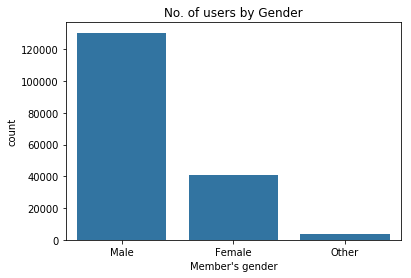

In [27]:
bar_plot('member_gender', "Member's gender", "No. of users by Gender")

> The number of male gender users of bike-sharing service overwhelming high more than female and other gender users. Over 120,000 males used the bike service in 2019.

**2. What is the distribution of User type?**

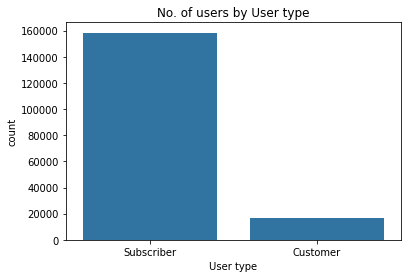

In [28]:
bar_plot('user_type', 'User type', 'No. of users by User type')

> From the above plot, we see subscribing users using the bike service are relatively high more than customer users. 

**3. What is the distribution for Age?**

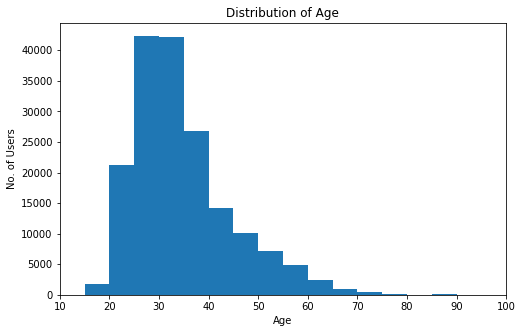

In [29]:
binsize = 5
bins = np.arange(0, gobike_clean['age'].max()+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data=gobike_clean, x='age', bins=bins)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('No. of Users')
plt.xlim(10, 100);

> The distribution of the age is skewed to the right with the most bike service users between ages 20 to 45.

**4. What is the distribution of months?**

In [30]:
print(gobike_clean.start_month.value_counts())
print(gobike_clean.end_month.value_counts())

February    174952
Name: start_month, dtype: int64
February    174938
March           14
Name: end_month, dtype: int64


> Since all trips in start month all have taken placed in month of February so need to plot the barplot.

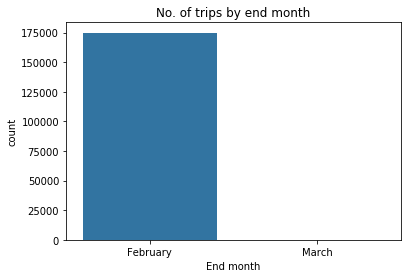

In [31]:
bar_plot('end_month', 'End month', 'No. of trips by end month')

Majority of the trips started and ended in February except only 14 trips ended in March. 

**5. What is the distribution of days?**

In [32]:
# Convert start_day and end_day into ordered category datatype
startday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_startday =pd.api.types.CategoricalDtype(ordered=True,
                                                categories=startday)
gobike_clean['start_day'] = gobike_clean['start_day'].astype(ordered_startday)

endday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_endday =pd.api.types.CategoricalDtype(ordered=True,
                                                categories=endday)
gobike_clean['end_day'] = gobike_clean['end_day'].astype(ordered_endday)

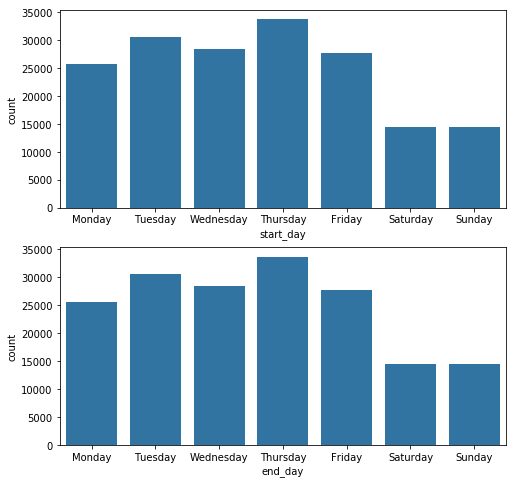

In [33]:
# Plot a counplot for both start_day and end_day
fig, ax = plt.subplots(2, figsize = [8, 8])

base_color = sb.color_palette()[0]
sb.countplot(data = gobike_clean, x='start_day', color=base_color, ax=ax[0]);
sb.countplot(data = gobike_clean, x='end_day', color=base_color, ax=ax[1]);

> Most of the trips for both start_day and end_day were taken on Thursdays, followed by Tuesdays. On the Weekends (Saturday & Sunday) were the least days of the week that trips were taken.

**5. What is distribution of hours?**

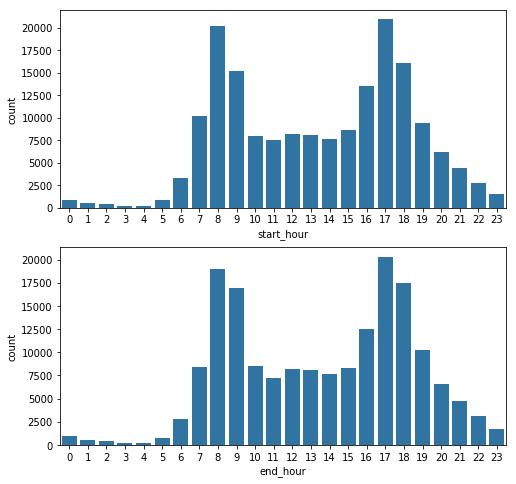

In [34]:
fig, ax = plt.subplots(2, figsize = [8, 8])

base_color = sb.color_palette()[0]
sb.countplot(data = gobike_clean, x='start_hour', color=base_color, ax=ax[0]);
sb.countplot(data = gobike_clean, x='end_hour', color=base_color, ax=ax[1]);

> As shown in the above, in both plots we see 8th, 9th, 17th and 18th hours of the day are most trips taken. This is expected since it can be linked to morning rush (8th & 9th) to work and to school for students and closing hours (17th & 18th) from work and from school.

**What is the distribution for trip duration?**

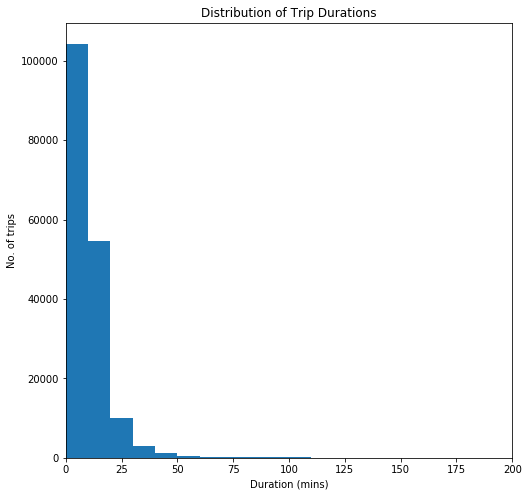

In [35]:
# Plot a histogram plot
binsize = 10
bins = np.arange(0, gobike_clean.duration_min.max()+binsize, binsize)

plt.figure(figsize=[8, 8])
plt.hist(data=gobike_clean, x='duration_min', bins=bins)
plt.xlabel('Duration (mins)')
plt.ylabel('No. of trips')
plt.title('Distribution of Trip Durations');
plt.xlim(0, 200);

> The above histogram is heavily skewed to the right therefore we shall apply log scale to transform the data.

**Log transformation**

In [36]:
gobike_clean.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [37]:
np.log10(gobike_clean.duration_min.describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration_min, dtype: float64

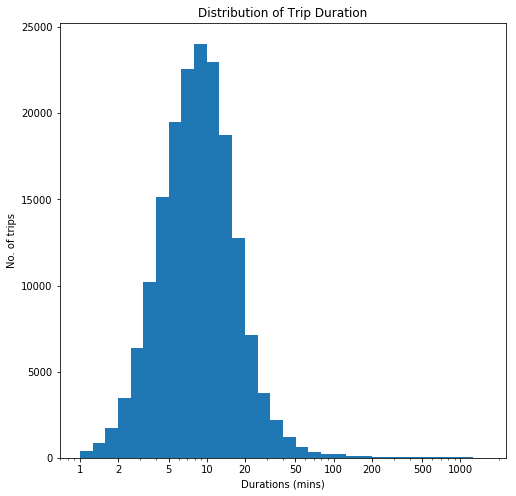

In [38]:
# plotting on a Logarthmic scale transformation
bins = 10 ** np.arange(0, np.log10(gobike_clean.duration_min).max()+0.1, 0.1)

plt.figure(figsize=[8, 8])
plt.hist(data=gobike_clean, x='duration_min', bins=bins)
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xlabel('Durations (mins)')
plt.ylabel('No. of trips')
plt.title('Distribution of Trip Duration')
plt.xscale('log')
plt.xticks(tick_locs, tick_locs);

> The distribution of duration when plotted on a log scale the distribution looks roughly bimodal with the highest peak between 8 minutes and 10 minutes. Majority of the trips lasts between 8 minutes and 15 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* Most users of the bike service are males and majority of the users are subscriber users.

* Most of the bike service users are between ages 20 and 45.

* Most trips were taken on Thurdays and the least trips taken on the weekends(Saturday & Sunday)

* Majority of the trips taken at 8 am and 9 am in the morning hours of day and at 5pm and 6pm in the evenings.

* The standard distribution of the duration is skewed to the right, so I used a log transformation on the x-axis which under log transformation the data looks bimodal with highest peak between 8 and 15 minutes.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* Converted the start_day and end_day columns to ordered category datatype.

* Created a new column(duration_min) from duration_sec variable and performed a log transformation on duration_min variable on the x-axis.

## Bivariate Exploration

> In this section, we will explore relationships between different pairs of variables. We will first explore the following:

* Numeric vs numeric interactions
* Categorical vs categorical interactions
* Numeric vs categorical interactions

> we then explore some variable relationships further.

**1. Numeric vs numeric interactions**

In [39]:
numeric_vars = ['age', 'start_hour', 'end_hour', 'duration_min']
categoric_vars = ['member_gender', 'start_day', 'end_day', 'user_type']

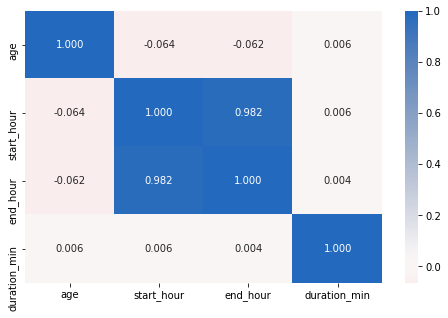

In [40]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(gobike_clean[numeric_vars].corr(), annot=True, fmt='.3f',
           cmap='vlag_r', center=0);

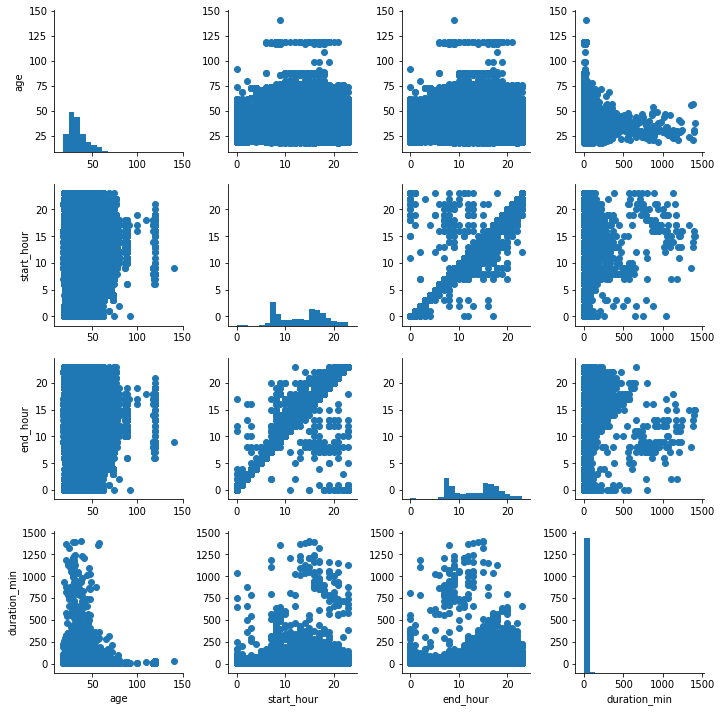

In [41]:
g = sb.PairGrid(data=gobike_clean, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);

> As expected, there is a positive correlation between start_hour and end_hour besides that there is no linear correlation between the numeric variables. Regardless of no linear correlation, we will explore the relation between age and duration_mins. There is a pattern between age and duration_min and to some extend, we can see the duration of the trip decreases as the age of user of bike service increases.

**What is the relation between trip duration and age?**

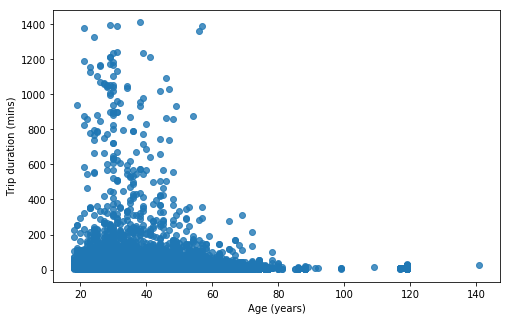

In [42]:
plt.figure(figsize=[8, 5])
sb.regplot(data=gobike_clean, x='age', y='duration_min', fit_reg=False)
plt.xlabel('Age (years)')
plt.ylabel('Trip duration (mins)');

> As expected, there is no linear correlation between age and trip duration. However, as shown on the plot above the highest trip duration are taken from riders within 20 to 60 years of age and most of the trip duration is between 0 and 200 mins. Let apply log scale transformation on duration_min on the y-axis.

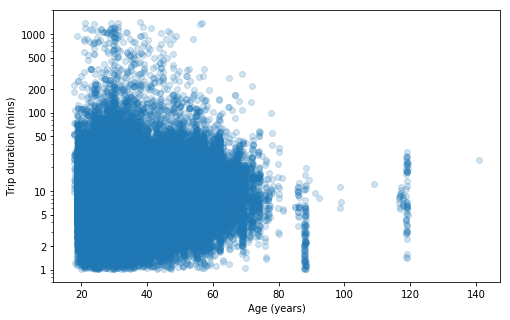

In [43]:
# Applying a log scale transformation
plt.figure(figsize=[8, 5])
sb.regplot(data=gobike_clean, x='age', y='duration_min', x_jitter=0.3,
           scatter_kws={'alpha' : 1/5}, fit_reg=False)
plt.yscale('log')
tick_locs = [1, 2, 5, 10, 50, 100, 200, 500, 1000]
plt.yticks(tick_locs, tick_locs)
plt.xlabel('Age (years)')
plt.ylabel('Trip duration (mins)');

> The linear correlation between age and trip duration cannot still be determined. However, as shown from the plot above the data is seen to be evenly distributed in contrast to the previous scatter plot.

**2. Categorical vs categorical interactions**

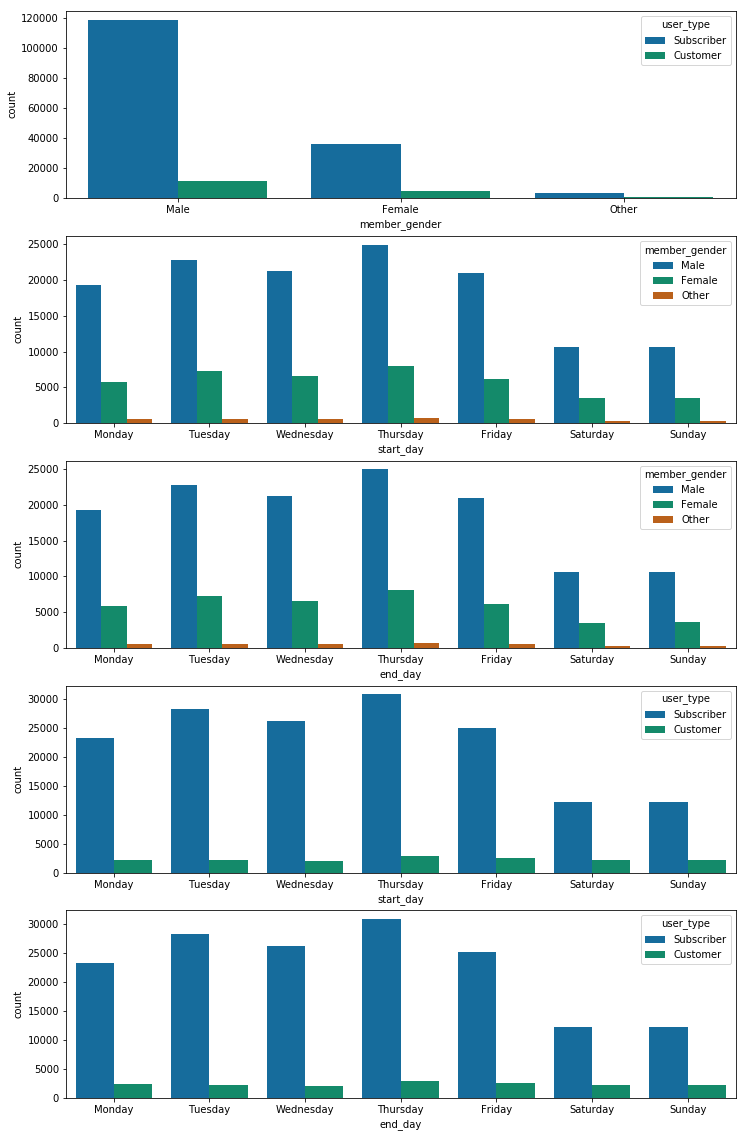

In [44]:
plt.figure(figsize = [12, 20])

order_gen = gobike_clean.member_gender.value_counts().index
order_user = gobike_clean.user_type.value_counts().index

# Member gender vs User type
plt.subplot(5, 1, 1)
sb.countplot(data=gobike_clean, x='member_gender', hue='user_type', hue_order=order_user, order=order_gen, palette='colorblind');

# Start day vs Member gender
plt.subplot(5, 1, 2)
sb.countplot(data=gobike_clean, x='start_day', hue='member_gender', hue_order=order_gen, palette='colorblind');

# End day vs Member gender
plt.subplot(5, 1, 3)
sb.countplot(data=gobike_clean, x='end_day', hue='member_gender', hue_order=order_gen, palette='colorblind');

# Start day vs User type
plt.subplot(5, 1, 4)
sb.countplot(data=gobike_clean, x='start_day', hue='user_type', hue_order=order_user, palette='colorblind');

# End day vs User type
plt.subplot(5, 1, 5)
sb.countplot(data=gobike_clean, x='end_day', hue='user_type', hue_order=order_user, palette='colorblind');

> As expected the male dominancy is reflected in the interactions: gender and user_type, gender and start_day & gender and end_day. There is a large number of male subscribers. The interactions: user_type and start_day & user_type and end_day also shows that the number of subscriber user overwhemingly high compared to customer users.

**3. Numeric vs categorical interactions**

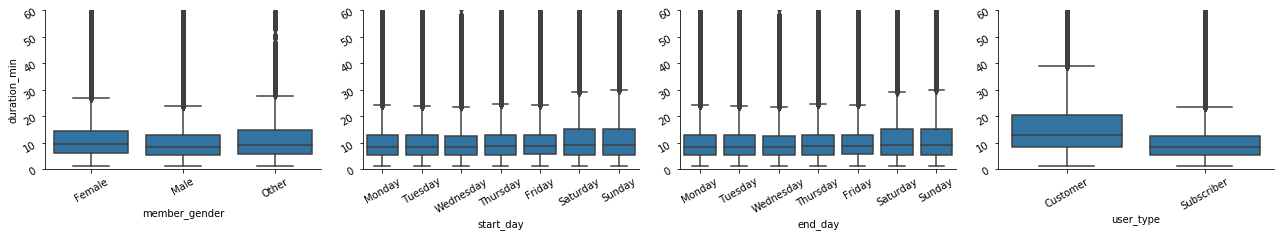

In [45]:
# define a function to plot boxplots grid
def boxgrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=base_color)
# Plotting boxgrid for trip duration vs categorical variables
plt.figure(figsize=[20, 22])
g = sb.PairGrid(data=gobike_clean, y_vars = 'duration_min', x_vars = categoric_vars,
                size=3, aspect = 1.5);
g.map(boxgrid)
for ax in g.axes.flatten():
    ax.tick_params(rotation=30)
plt.ylim(0, 60)
plt.show()

> We trimmed the trip duration to 60 minutes y-axis values to have a better view of the box plots. From the boxplots above: Female and other gender have a longer trip duration than males; The trip duration is longer on the weekends(Saturday and Sunday); and customer users of the bike service have longer trip duration than subscribing users.

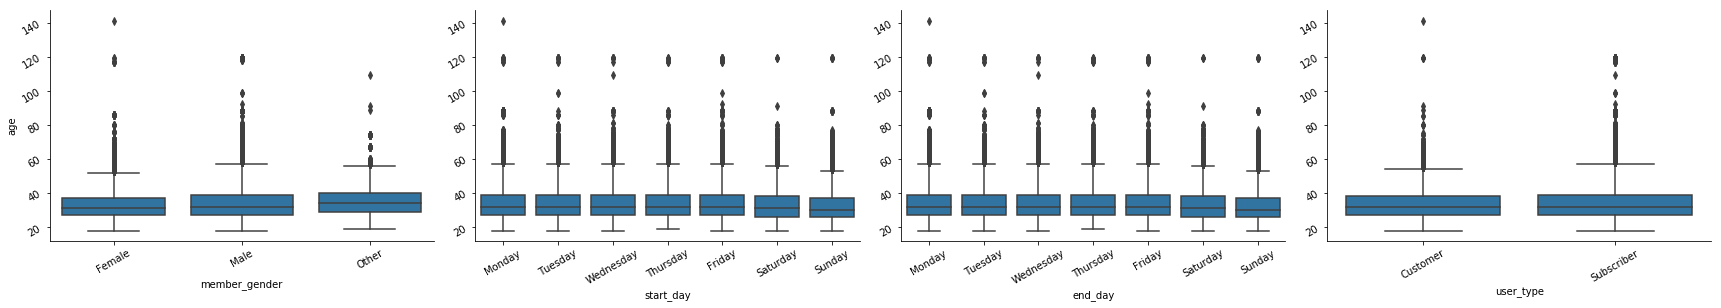

In [46]:
# plotting boxgrid for age vs categorical variables
plt.figure(figsize=[22, 22])
g = sb.PairGrid(data=gobike_clean, y_vars = 'age', x_vars = categoric_vars,
                size=4, aspect = 1.5);
g.map(boxgrid)
for ax in g.axes.flatten():
    ax.tick_params(rotation=30)
plt.show();

> From the above box plots, we can see that female members of bike service are slightly younger than male and other genders and riders who take trips on sundays' are slightly younger than riders who take trips the rest of the days of the week.

> Let us explore further the interaction between duration_min & age and categorical variables and perform a log transformation on duration_min variable.

In [47]:
# Compute the logarithmic scale on duration_min
def log_trans(x, inverse = False):
    """quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
gobike_clean['log_duration_min'] = gobike_clean['duration_min'].apply(log_trans)

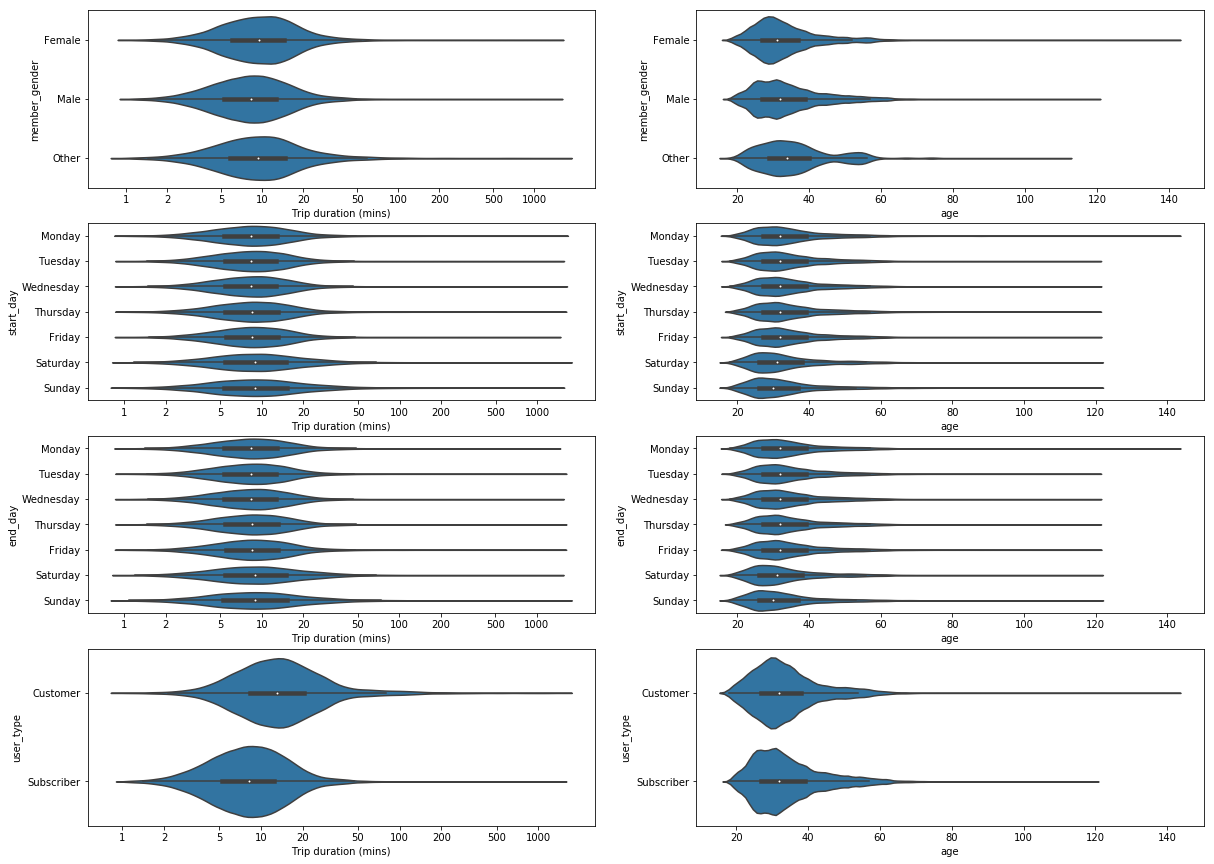

In [48]:
# Plot the categorical variables against duration_min and age again with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 4, figsize = [20, 15])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = gobike_clean, y = var, x = 'log_duration_min', ax=ax[i,0], color=base_color)
    ax[i,0].set_xticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])));
    ax[i,0].set_xticklabels([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]);
    ax[i,0].set_xlabel('Trip duration (mins)')
    sb.violinplot(data = gobike_clean, y = var, x ='age', ax=ax[i,1], color=base_color);

> From the above plot matrix, we observed:

* Female using the bike service take slightly longer trip duration compared to male and other gender users.

* Male and other gender users are slighly older than female users. Also other gender age distribution is bimodal distribution.

* The duration of trips taken are longer on the weekends compared to other days of the week.

* The median age of users who use the bike service everyday is about 30 years of age. Also slighly younger bike users use the bike service on sunday compared to other days of the week.

* Customer users take longer trip duration compared to subscribing users.

* There is relatively small difference in age distribution for subscribing users and customers, where subsribers are bit older than customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Most subscriber users are males and also most customer users are males.

* Male users take overwhelming more trips through out the week compared to female and other gender.

* On Thursdays are when the most trips are taken for all genders while Saturdays and Sundays (Weekends) are when the least number of trips are taken.

* Duration of trips taken are longer on the weekends than on weekdays.

* Users ages 20 to 60 tend to take longer trip duration compared to other ages.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Subcriber users take relatively more trips on weekdays than weekends while customer users the number of trip they take on weekdays and weekends there is no relative difference.

* Female using the bike service take slightly longer trip duration compared to male and other gender users.

## Multivariate Exploration

> In this section, we will create plots of three or more variables to explore the data even further.

**1. Comparing the association between age, gender and trip duration**

In [49]:
# Define a function to create heatmaps
def hist2grid(x, y, **kwargs):
    """creating heatmaps with seaborn's PairGrid."""
    palette = kwargs.pop('color')
    bins_x = np.arange(0, gobike_clean['age'].max()+5, 5)
    bins_y = np.arange(0, 3.2+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap=palette, cmin=0.5)
    plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])),
               [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]);

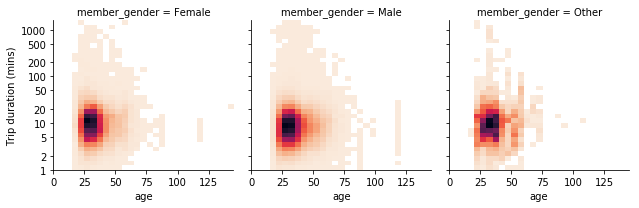

In [50]:
# Plot a heatmap grid for age, duration vs gender
g = sb.FacetGrid(data=gobike_clean, col='member_gender', col_wrap=3, size=3)
g.map(hist2grid, 'age', 'log_duration_min', color='rocket_r')
g.set_xlabels('age')
g.set_ylabels('Trip duration (mins)');

* Younger Female users take longer rides compare to younger male users while more older males user take longer trip than older female users.

* Also Comparing the genders types as it relates to trip duration, the age 20 to 60 represent the age group that takes the longest bike trips.

**2. Comparing the association between age, user_type and trip duration**

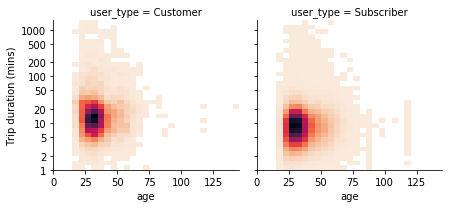

In [51]:
# Plot a heatmap grid for age, duration vs user type
g = sb.FacetGrid(data=gobike_clean, col='user_type', col_wrap=4, size=3)
g.map(hist2grid, 'age', 'log_duration_min', color='rocket_r')
g.set_xlabels('age')
g.set_ylabels('Trip duration (mins)');

* Subscriber are slighly older than customers users and customer users generally take longer bike trip than subscriber of relatively same age.

* Also comparing user types as it relates to trip duration, majority of the users are between age 20 and 60.

**4. Comparing the association between Trip duration, gender and day of the week**

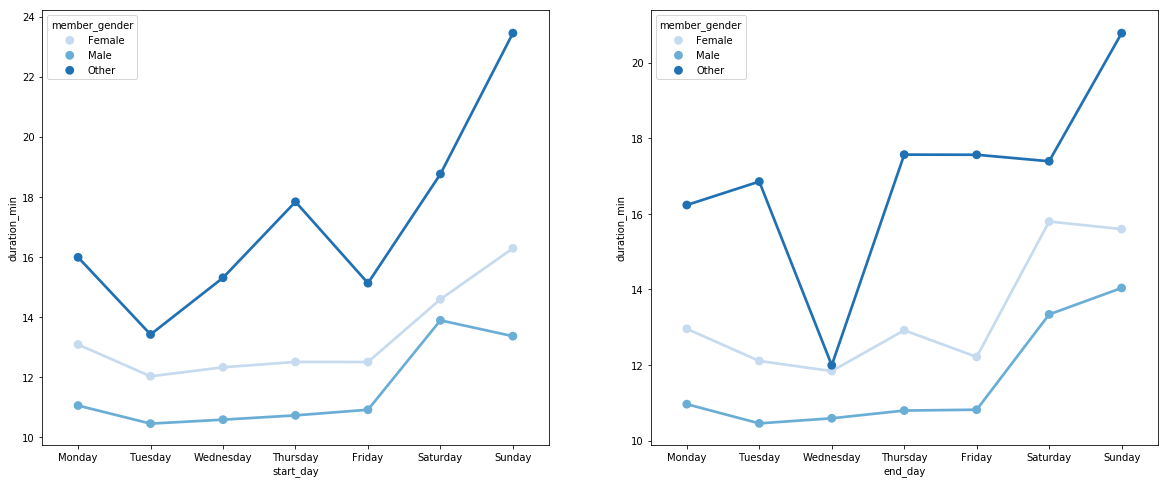

In [52]:
fig = plt.figure(figsize=[20,8])

plt.subplot(1, 2, 1)
sb.pointplot(data=gobike_clean, x='start_day', y='duration_min', hue='member_gender', palette='Blues', ci=None)

plt.subplot(1, 2, 2)
sb.pointplot(data=gobike_clean, x='end_day', y='duration_min', hue='member_gender', palette='Blues', ci=None);

> As expected the trip duration trends up on the weekends from Fridays to Saturdays. Male users still take the shortest bike trips compared to female and other gender.

**5. Comparing the association between Trip duration, user_type and day of the week**

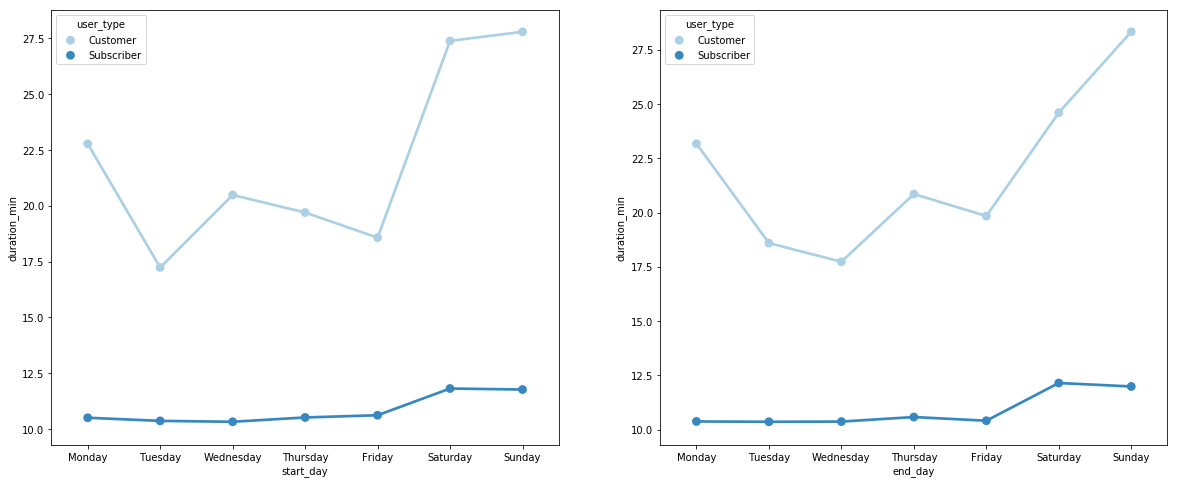

In [53]:
fig = plt.figure(figsize=[20,8])

plt.subplot(1, 2, 1)
sb.pointplot(data=gobike_clean, x='start_day', y='duration_min', hue='user_type', palette='Blues', ci=None)

plt.subplot(1, 2, 2)
sb.pointplot(data=gobike_clean, x='end_day', y='duration_min', hue='user_type', palette='Blues', ci=None);

> Not suprising, the trip duration for both subscribing and customers trends up on the weekends. Customer users still takes the longest bike trips than subscriber users

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Younger Female users take longer rides compare to younger male users while more older males user take longer trip than older female users.

* Both subscriber and customer users take longer bike trips on the weekends compared to weekdays and overall, customer users take the longest bike trips.

* Subscriber are slighly older than customers users and customer users generally take longer bike trip than subscriber of relatively same age.

* Most users of the bike service in the age group 20 to 60 represent the age group that takes the longest bike rides.

* Overall the longer bike trips for all the gender types are taken on the weekends.

### Were there any interesting or surprising interactions between features?

> Customers users take longer trip duration regardless of the day of the week compared to subscriber users was quite surprising to me.



## Conclusions

Some of the main conclusions we have derived from the analysis:

* On average the duration for all trips is between 8 to 15 minutes.

* Most trips are taken by males than females and other gender.

* Females take longer trip duration compared to males.

* Most trips are taken on Thursdays and Tuesdays whereas lesser trip are taken on weekends.

* Trip duration on the weekends normally longer than on weekdays.

* 8 & 9 hrs in the morning hours and 17 & 18 hrs in the evening hours recorded the highest number of bike trips taken.

* Customer users take the longer trip durations regardless of the day of the week compared to subscribers.

* Subscriber users take most trips compared to customer users.

* Most users of the bike service  in the age group 20 to 60 represent the age group that takes the longest bike rides.

* Almost all trips were taken in February.
